# Import Data

In [113]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import MinMaxScaler

In [115]:
titanic = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TheTitanic.csv')
titanic.head()

,1,2,3,4,5,6,7,8,9,10
0,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
3,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
4,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90


## Data Preprocessing 

### Create header 

In [11]:
titanic.columns = titanic.iloc[0]
titanic.head()

,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
0,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
3,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
4,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90


In [13]:
titanic = titanic[1:].reset_index(drop=True)
titanic.head()

,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90


In [15]:
titanic.rename(columns={titanic.columns[3]:'name'}, inplace=True)
titanic.head()

,sn,pclass,survived,name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90


### Split column name

In [18]:
titanic[['first_person', 'second_person']] = titanic['name'].str.split(", ", expand=True)
titanic.head()

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
0,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90,Mr. Anthony,None
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90,Mr. Anthony,None
2,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90,Master. Eugene Joseph,None
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90,Abbott,Mr. Rossmore Edward
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90,Abbott,Mr. Rossmore Edward


## Exploratory Data Analysis (EDA)

### Check Missing Value

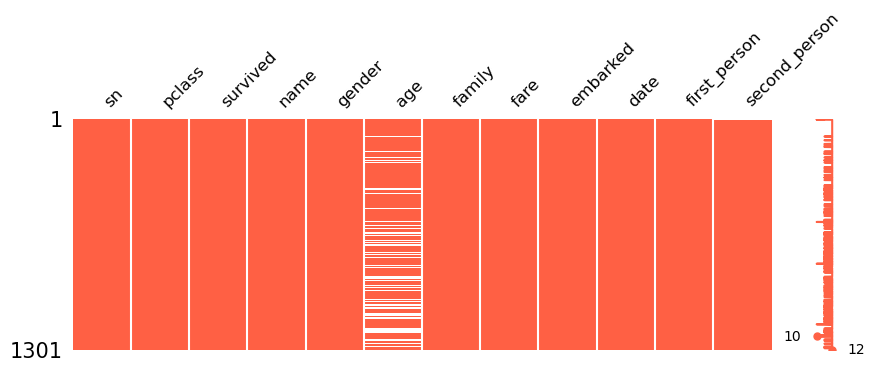

In [22]:
msno.matrix(titanic, figsize=(10,3), fontsize=12, color=(1, 0.38, 0.27));
plt.show()

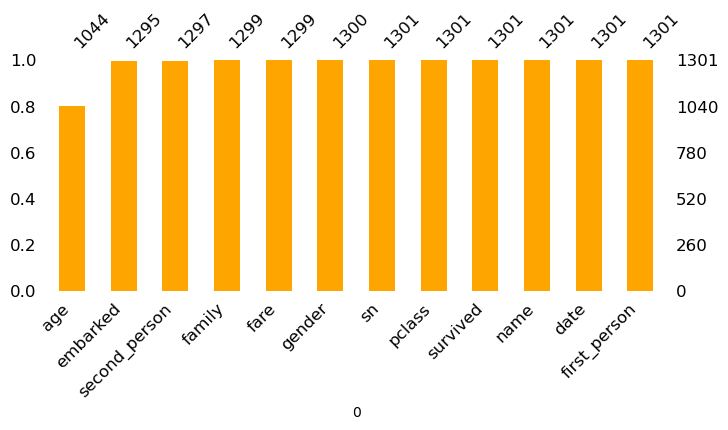

In [24]:
msno.bar(titanic, color="orange", sort="ascending", figsize=(8,3), fontsize=12);

In [26]:
missing_values = titanic.isnull().sum().sort_values()[titanic.isnull().sum().sort_values(ascending=False) !=0]
missing_values.head(10)

0
gender             1
family             2
fare               2
second_person      4
embarked           6
age              257
dtype: int64

#### Gender

In [29]:
titanic.gender.value_counts(dropna=False)

gender
male      835
female    465
NaN         1
Name: count, dtype: int64

In [31]:
titanic[titanic["gender"].isna()]

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90,Abbott,Mr. Rossmore Edward


In [33]:
titanic[titanic["name"] == 'Abbott, Mr. Rossmore Edward']

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90,Abbott,Mr. Rossmore Edward
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90,Abbott,Mr. Rossmore Edward


In [35]:
titanic = titanic.dropna(subset=["gender"])

In [37]:
titanic.gender.value_counts(dropna=False)

gender
male      835
female    465
Name: count, dtype: int64

In [39]:
gender_counts = titanic["gender"].value_counts()

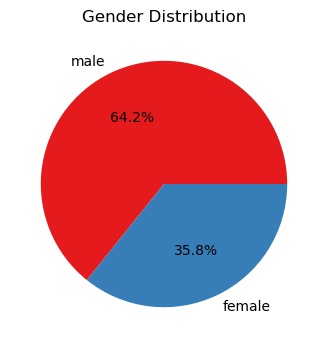

In [41]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette("Set1") 
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Gender Distribution")
plt.show()

#### Family

In [44]:
titanic.family.isnull().sum()

2

In [46]:
titanic[titanic.family.isna()]

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
579,579,1,1,"Icard, Miss. Amelie",female,38,NaN,80,NaN,02-Aug-91,Icard,Miss. Amelie
1155,1155,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,NaN,80,NaN,28-Feb-93,Stone,Mrs. George Nelson (Martha Evelyn)


In [48]:
titanic[titanic["name"].isin(['Icard, Miss. Amelie', 'Stone, Mrs. George Nelson (Martha Evelyn)'])]

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
579,579,1,1,"Icard, Miss. Amelie",female,38,NaN,80,NaN,02-Aug-91,Icard,Miss. Amelie
1155,1155,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,NaN,80,NaN,28-Feb-93,Stone,Mrs. George Nelson (Martha Evelyn)


In [50]:
titanic = titanic.dropna(subset=["family"])
titanic.family.isnull().sum()

0

#### Fare

In [53]:
titanic.fare.isnull().sum()

2

In [55]:
titanic[titanic.fare.isna()]

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
814,814,3,1,Miss. Elizabeth,female,0.17,3,NaN,S,24-Mar-92,Miss. Elizabeth,None
1156,1156,3,0,"Storey, Mr. Thomas",male,60.5,0,NaN,S,01-Mar-93,Storey,Mr. Thomas


In [57]:
titanic = titanic.dropna(subset=["fare"])
titanic.fare.isnull().sum()

0

#### Embarked 

In [60]:
embarked_counts = titanic["embarked"].value_counts()

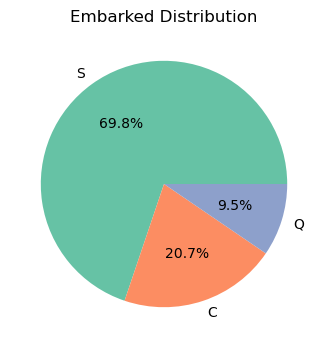

In [62]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette("Set2") 
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Embarked Distribution")
plt.show()

In [64]:
titanic['embarked'] = titanic['embarked'].bfill()

In [66]:
titanic.fare.isnull().sum()

0

#### Age

In [69]:
titanic.age.isnull().sum()

256

In [71]:
titanic[titanic.age == '?']

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
2,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90,Master. Eugene Joseph,None


In [73]:
titanic["age"] = titanic["age"].replace("?", np.nan)

In [75]:
titanic['age'] = titanic.age.astype('float').mean()

In [77]:
#Fill the missing value with mean of age
titanic["age"] = titanic["age"].fillna(titanic["age"].mean())

In [79]:
titanic.age.isnull().sum()

0

In [81]:
titanic.isnull().sum()

0
sn               0
pclass           0
survived         0
name             0
gender           0
age              0
family           0
fare             0
embarked         0
date             0
first_person     0
second_person    3
dtype: int64

### Data Formating

In [84]:
titanic.head()

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
0,1,3,0,Mr. Anthony,male,29.939605,0,7.55,S,01-Jan-90,Mr. Anthony,None
1,1,3,0,Mr. Anthony,male,29.939605,0,7.55,S,01-Jan-90,Mr. Anthony,None
2,2,3,0,Master. Eugene Joseph,male,29.939605,2,20.25,S,02-Jan-90,Master. Eugene Joseph,None
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,29.939605,2,20.25,S,04-Jan-90,Abbott,Mr. Rossmore Edward
5,5,3,1,"Abelseth, Miss. Karen Marie",female,29.939605,0,7.65,S,05-Jan-90,Abelseth,Miss. Karen Marie


In [86]:
titanic.dtypes

0
sn                object
pclass            object
survived          object
name              object
gender            object
age              float64
family            object
fare              object
embarked          object
date              object
first_person      object
second_person     object
dtype: object

In [88]:
titanic[['pclass', 'embarked']] = titanic[['pclass', 'embarked']].astype('category')

In [90]:
titanic['fare'] = titanic['fare'].astype('float')

In [92]:
titanic.dtypes.sort_index()

0
age               float64
date               object
embarked         category
family             object
fare              float64
first_person       object
gender             object
name               object
pclass           category
second_person      object
sn                 object
survived           object
dtype: object

In [94]:
titanic.head(10)

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
0,1,3,0,Mr. Anthony,male,29.939605,0,7.5500,S,01-Jan-90,Mr. Anthony,None
1,1,3,0,Mr. Anthony,male,29.939605,0,7.5500,S,01-Jan-90,Mr. Anthony,None
2,2,3,0,Master. Eugene Joseph,male,29.939605,2,20.2500,S,02-Jan-90,Master. Eugene Joseph,None
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,29.939605,2,20.2500,S,04-Jan-90,Abbott,Mr. Rossmore Edward
5,5,3,1,"Abelseth, Miss. Karen Marie",female,29.939605,0,7.6500,S,05-Jan-90,Abelseth,Miss. Karen Marie
6,6,3,1,"Abelseth, Mr. Olaus Jorgensen",male,29.939605,0,7.6500,S,06-Jan-90,Abelseth,Mr. Olaus Jorgensen
7,7,2,0,"Abelson, Mr. Samuel",male,29.939605,1,24.0000,C,07-Jan-90,Abelson,Mr. Samuel
8,8,2,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,29.939605,1,24.0000,C,08-Jan-90,Abelson,Mrs. Samuel (Hannah Wizosky)
9,9,3,1,"Abrahamsson, Mr. Abraham August Johannes",male,29.939605,0,7.9250,S,09-Jan-90,Abrahamsson,Mr. Abraham August Johannes
10,10,3,1,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,29.939605,0,7.2292,C,10-Jan-90,Abrahim,Mrs. Joseph (Sophie Halaut Easu)


### Data Normalization

In [97]:
titanic.describe()

,age,fare
count,1.296000e+03,1296.000000
mean,2.993961e+01,33.390364
std,3.731789e-13,51.928704
min,2.993961e+01,0.000000
25%,2.993961e+01,7.895800
50%,2.993961e+01,14.454200
75%,2.993961e+01,31.275000
max,2.993961e+01,512.329200


In [99]:
scaler = MinMaxScaler()
titanic[['fare', 'age']] = scaler.fit_transform(titanic[['fare', 'age']])
titanic.head()

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
0,1,3,0,Mr. Anthony,male,0.0,0,0.014737,S,01-Jan-90,Mr. Anthony,None
1,1,3,0,Mr. Anthony,male,0.0,0,0.014737,S,01-Jan-90,Mr. Anthony,None
2,2,3,0,Master. Eugene Joseph,male,0.0,2,0.039525,S,02-Jan-90,Master. Eugene Joseph,None
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,0.0,2,0.039525,S,04-Jan-90,Abbott,Mr. Rossmore Edward
5,5,3,1,"Abelseth, Miss. Karen Marie",female,0.0,0,0.014932,S,05-Jan-90,Abelseth,Miss. Karen Marie


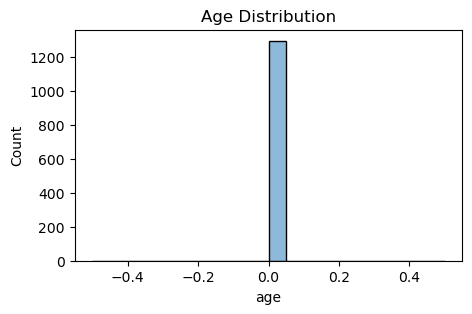

In [101]:
plt.figure(figsize=(5, 3))
sns.histplot(titanic['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

/var/folders/2x/6fsw7m312dz672_tnvybw_q00000gn/T/ipykernel_14771/3795544699.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
/var/folders/2x/6fsw7m312dz672_tnvybw_q00000gn/T/ipykernel_14771/3795544699.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


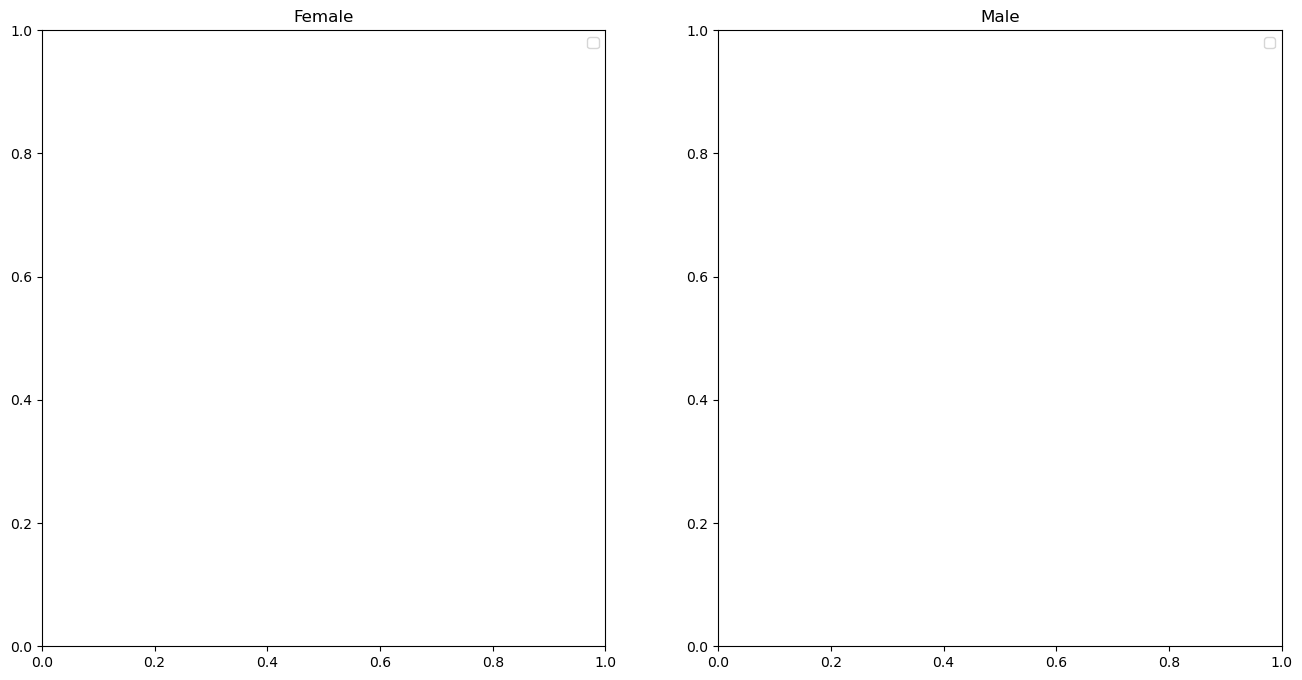

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Loop untuk gender (female dan male)
for i, gender in enumerate(['female', 'male']):
    data = titanic[titanic['gender'] == gender]
    
    sns.histplot(data[data['survived'] == 1]['age'].dropna(), bins=18, label='Survived', ax=axes[i], color="green", kde=False)
    sns.histplot(data[data['survived'] == 0]['age'].dropna(), bins=40, label='Not Survived', ax=axes[i], color="red", kde=False)

    axes[i].legend()
    axes[i].set_title(gender.capitalize())

plt.show()


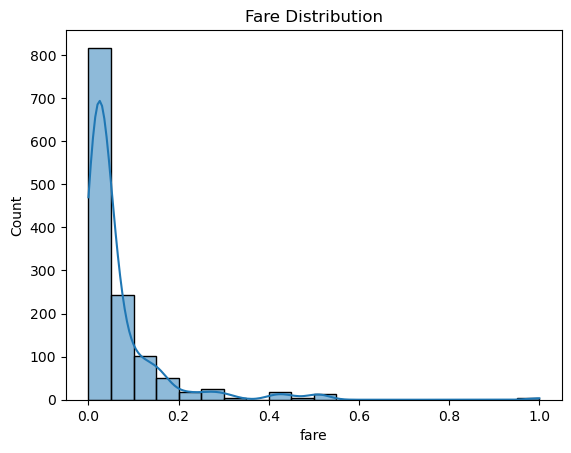

In [181]:
sns.histplot(titanic['fare'], bins=20, kde=True)
plt.title('Fare Distribution')
plt.show()

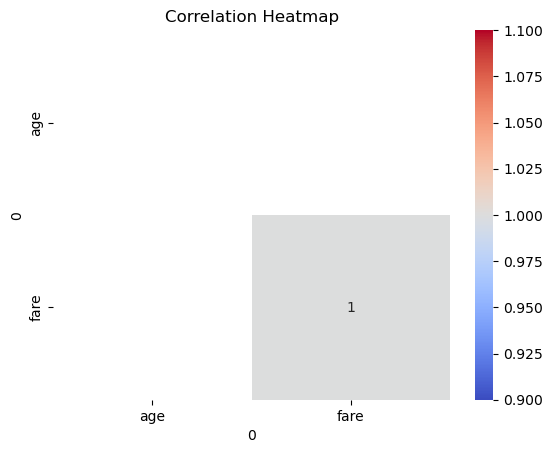

In [187]:
titanic_numeric = titanic.select_dtypes(include=['int64', 'float64'])
sns.heatmap(titanic_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [192]:
titanic[['age', 'fare']].corr()

,age,fare
0,,
age,NaN,NaN
fare,NaN,1.0
